In [1]:
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
root_dir = 'C:/Users/frank/data_analysis/age-classification'
path = root_dir + '/archive/train/' #이미지 경로
image_folders = os.listdir(path)
image_folders.pop(0)
image_paths = [path+image_folder for image_folder in image_folders]
modified_path = root_dir + '/archive_sample100/train/' #샘플링된 이미지가 저장될 경로
modified_image_paths = [modified_path+image_folder for image_folder in image_folders]

In [3]:
# modified_path : archive_sample100. 100개 데이터만 샘플링한 것
# 데이터를 바꾸고 싶으면 data_dir에 들어가는 path를 다른 것으로 바꿔주면 됨
data_dir = modified_path
img_height, img_width = 224, 224
batch_size = 32

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 4983 files belonging to 53 classes.
Using 3987 files for training.
Found 4983 files belonging to 53 classes.
Using 996 files for validation.


In [44]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, losses, metrics

IMG_SHAPE = (img_height, img_width) + (3,)

inputs = tf.keras.Input(shape=IMG_SHAPE)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1, activation='linear')(x)

simple_model = tf.keras.Model(inputs, outputs)


base_learning_rate = 0.0001

simple_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=base_learning_rate),
              loss='mse',
              metrics=['mae'])

In [45]:
simple_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 128)       7385

In [47]:
history = simple_model.fit(train_ds,
                           epochs=5,
                           validation_data=val_ds)

Epoch 1/5
125/125 [==============================] - ETA: 3:03 - loss: 855.7908 - mae: 25.25 - ETA: 2:20 - loss: 829.2849 - mae: 24.76 - ETA: 2:16 - loss: 888.5833 - mae: 26.13 - ETA: 2:28 - loss: 746.0478 - mae: 23.28 - ETA: 2:34 - loss: 660.0356 - mae: 21.80 - ETA: 2:37 - loss: 614.8427 - mae: 21.04 - ETA: 2:39 - loss: 615.9235 - mae: 21.08 - ETA: 2:39 - loss: 568.6607 - mae: 19.98 - ETA: 2:39 - loss: 533.7103 - mae: 19.31 - ETA: 2:38 - loss: 504.3042 - mae: 18.67 - ETA: 2:37 - loss: 471.9619 - mae: 17.94 - ETA: 2:38 - loss: 453.9029 - mae: 17.55 - ETA: 2:43 - loss: 446.9936 - mae: 17.40 - ETA: 2:45 - loss: 453.5578 - mae: 17.44 - ETA: 2:46 - loss: 441.7879 - mae: 17.17 - ETA: 2:46 - loss: 425.0840 - mae: 16.82 - ETA: 2:45 - loss: 419.3750 - mae: 16.75 - ETA: 2:46 - loss: 414.0065 - mae: 16.67 - ETA: 2:46 - loss: 410.7302 - mae: 16.58 - ETA: 2:46 - loss: 402.0752 - mae: 16.42 - ETA: 2:46 - loss: 397.3429 - mae: 16.33 - ETA: 2:46 - loss: 409.4371 - mae: 16.56 - ETA: 2:45 - loss: 433.5

125/125 [==============================] - ETA: 6:24 - loss: 295.2692 - mae: 13.57 - ETA: 5:45 - loss: 251.5169 - mae: 12.62 - ETA: 5:22 - loss: 242.1893 - mae: 12.61 - ETA: 5:07 - loss: 237.7039 - mae: 12.57 - ETA: 4:56 - loss: 233.6445 - mae: 12.61 - ETA: 4:45 - loss: 230.8516 - mae: 12.69 - ETA: 4:36 - loss: 228.2603 - mae: 12.65 - ETA: 4:28 - loss: 224.9008 - mae: 12.64 - ETA: 4:19 - loss: 219.0407 - mae: 12.53 - ETA: 4:11 - loss: 218.1691 - mae: 12.46 - ETA: 4:04 - loss: 215.2718 - mae: 12.42 - ETA: 3:58 - loss: 217.4868 - mae: 12.57 - ETA: 3:52 - loss: 215.2677 - mae: 12.50 - ETA: 3:46 - loss: 216.9159 - mae: 12.55 - ETA: 3:41 - loss: 218.2558 - mae: 12.61 - ETA: 3:36 - loss: 219.8855 - mae: 12.68 - ETA: 3:32 - loss: 217.3068 - mae: 12.59 - ETA: 3:28 - loss: 216.3035 - mae: 12.58 - ETA: 3:25 - loss: 216.0533 - mae: 12.60 - ETA: 3:22 - loss: 217.1602 - mae: 12.63 - ETA: 3:19 - loss: 218.0125 - mae: 12.68 - ETA: 3:17 - loss: 224.2335 - mae: 12.84 - ETA: 3:13 - loss: 225.1381 - mae:

125/125 [==============================] - ETA: 3:17 - loss: 264.3039 - mae: 14.43 - ETA: 2:58 - loss: 213.4473 - mae: 12.78 - ETA: 2:56 - loss: 222.1527 - mae: 13.12 - ETA: 2:52 - loss: 216.0457 - mae: 12.74 - ETA: 2:51 - loss: 222.2274 - mae: 12.94 - ETA: 2:47 - loss: 211.4967 - mae: 12.45 - ETA: 2:46 - loss: 219.6137 - mae: 12.74 - ETA: 2:44 - loss: 219.5499 - mae: 12.66 - ETA: 2:41 - loss: 227.9023 - mae: 12.96 - ETA: 2:40 - loss: 224.6945 - mae: 12.82 - ETA: 2:38 - loss: 219.2781 - mae: 12.59 - ETA: 2:37 - loss: 220.4265 - mae: 12.70 - ETA: 2:36 - loss: 218.7356 - mae: 12.64 - ETA: 2:34 - loss: 215.7202 - mae: 12.56 - ETA: 2:33 - loss: 217.1814 - mae: 12.62 - ETA: 2:32 - loss: 217.5157 - mae: 12.65 - ETA: 2:31 - loss: 217.1360 - mae: 12.63 - ETA: 2:31 - loss: 216.7954 - mae: 12.65 - ETA: 2:29 - loss: 217.8047 - mae: 12.66 - ETA: 2:29 - loss: 218.3255 - mae: 12.67 - ETA: 2:28 - loss: 219.3964 - mae: 12.70 - ETA: 2:27 - loss: 221.4423 - mae: 12.80 - ETA: 2:26 - loss: 218.4228 - mae:

125/125 [==============================] - ETA: 5:16 - loss: 273.6808 - mae: 14.36 - ETA: 4:51 - loss: 227.6552 - mae: 12.49 - ETA: 4:33 - loss: 223.3478 - mae: 12.65 - ETA: 4:21 - loss: 225.1567 - mae: 12.83 - ETA: 4:12 - loss: 224.0806 - mae: 12.92 - ETA: 4:02 - loss: 218.7683 - mae: 12.82 - ETA: 3:54 - loss: 219.5006 - mae: 12.88 - ETA: 3:46 - loss: 219.2936 - mae: 12.88 - ETA: 3:39 - loss: 211.7115 - mae: 12.57 - ETA: 3:34 - loss: 217.6685 - mae: 12.80 - ETA: 3:29 - loss: 215.4115 - mae: 12.69 - ETA: 3:24 - loss: 215.1674 - mae: 12.69 - ETA: 3:21 - loss: 216.5222 - mae: 12.73 - ETA: 3:17 - loss: 214.0638 - mae: 12.63 - ETA: 3:13 - loss: 217.6015 - mae: 12.75 - ETA: 3:10 - loss: 214.8937 - mae: 12.61 - ETA: 3:06 - loss: 217.0727 - mae: 12.69 - ETA: 3:03 - loss: 217.8791 - mae: 12.73 - ETA: 3:00 - loss: 214.9901 - mae: 12.61 - ETA: 2:57 - loss: 215.2417 - mae: 12.63 - ETA: 2:55 - loss: 218.1572 - mae: 12.72 - ETA: 2:52 - loss: 219.1108 - mae: 12.76 - ETA: 2:50 - loss: 219.5858 - mae:

125/125 [==============================] - ETA: 5:52 - loss: 300.3913 - mae: 15.17 - ETA: 4:48 - loss: 252.4968 - mae: 13.72 - ETA: 4:37 - loss: 236.0660 - mae: 13.23 - ETA: 4:24 - loss: 211.7232 - mae: 12.19 - ETA: 4:14 - loss: 215.7533 - mae: 12.37 - ETA: 4:05 - loss: 224.8566 - mae: 12.74 - ETA: 3:59 - loss: 219.5309 - mae: 12.46 - ETA: 3:53 - loss: 226.3795 - mae: 12.79 - ETA: 3:48 - loss: 220.3183 - mae: 12.63 - ETA: 3:42 - loss: 222.1243 - mae: 12.77 - ETA: 3:37 - loss: 217.2554 - mae: 12.58 - ETA: 3:32 - loss: 214.2145 - mae: 12.49 - ETA: 3:29 - loss: 214.7361 - mae: 12.51 - ETA: 3:25 - loss: 213.0649 - mae: 12.46 - ETA: 3:22 - loss: 213.5004 - mae: 12.51 - ETA: 3:19 - loss: 214.0180 - mae: 12.57 - ETA: 3:15 - loss: 213.5926 - mae: 12.53 - ETA: 3:10 - loss: 211.9294 - mae: 12.49 - ETA: 3:06 - loss: 210.9897 - mae: 12.46 - ETA: 3:03 - loss: 208.4001 - mae: 12.35 - ETA: 3:00 - loss: 210.3614 - mae: 12.39 - ETA: 2:56 - loss: 217.8432 - mae: 12.60 - ETA: 2:53 - loss: 218.8339 - mae:

In [48]:
history.history

{'loss': [322.6862487792969,
  219.60244750976562,
  213.8236541748047,
  215.1584930419922,
  211.30690002441406],
 'mae': [14.737058639526367,
  12.70189094543457,
  12.553072929382324,
  12.661480903625488,
  12.460980415344238],
 'val_loss': [265.9073791503906,
  203.03817749023438,
  216.68316650390625,
  217.9326171875,
  194.19253540039062],
 'val_mae': [13.581344604492188,
  12.149106979370117,
  12.498139381408691,
  12.502823829650879,
  11.870802879333496]}

In [49]:
# 실제로 True값과 Predicted값을 비교해보기 위한 코드. val_ds에서 3개만 가져와서 해봄
i = 1
image_batch_list = []
label_batch_list = []
for image_batch, label_batch in val_ds:
    image_batch_list.append(image_batch)
    label_batch_list.append(label_batch)
    i+=1
    if i == 4: break

In [53]:
import pandas as pd
for image_batch, label_batch in zip(image_batch_list, label_batch_list):
    predicted_labels = simple_model.predict(image_batch)
    df = pd.DataFrame({'true':np.array(label_batch).reshape(-1,), 
                       'pred':predicted_labels.reshape(-1,)})
    df = df + 18
    df['diff'] = df['true']-df['pred']
    print(df)

    true       pred       diff
0     46  44.043716   1.956284
1     20  41.397190 -21.397190
2     64  43.960968  20.039032
3     37  36.791412   0.208588
4     63  39.808662  23.191338
5     35  42.666859  -7.666859
6     36  40.546673  -4.546673
7     38  41.917007  -3.917007
8     56  42.126362  13.873638
9     23  42.730164 -19.730164
10    58  41.119289  16.880711
11    34  39.710285  -5.710285
12    53  43.737553   9.262447
13    65  42.796066  22.203934
14    42  41.546864   0.453136
15    33  39.293247  -6.293247
16    58  40.149281  17.850719
17    58  42.352898  15.647102
18    42  40.764259   1.235741
19    51  45.780037   5.219963
20    57  44.313328  12.686672
21    48  42.466427   5.533573
22    57  39.709557  17.290443
23    46  43.427879   2.572121
24    25  38.485012 -13.485012
25    37  42.678486  -5.678486
26    62  41.901783  20.098217
27    45  43.510689   1.489311
28    44  40.715290   3.284710
29    40  39.018234   0.981766
30    25  39.964104 -14.964104
31    29

In [55]:
# 모델 저장
simple_model.save('SimpleModel_Sample100_Epoch5')

INFO:tensorflow:Assets written to: SimpleModel_Sample100_Epoch5\assets


In [56]:
tmplist = [13.581344604492188,
  12.149106979370117,
  12.498139381408691,
  12.502823829650879,
  11.870802879333496]

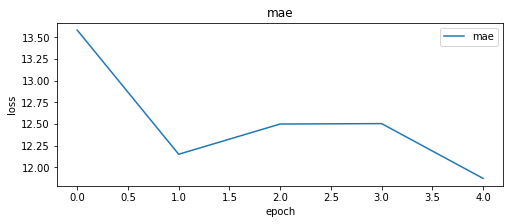

In [59]:
plt.figure(figsize = (8, 3))
plt.title('mae')
plt.plot(tmplist, label='mae')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()